In [5]:
# zomato project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [6]:
df1=pd.read_csv("zomato.csv")

In [7]:
df1

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [ ]:
# making functions to remove upon value in rating

In [29]:
def handle_rate(value):
    value = str(value).split('/')
    return float(value[0])

df1['rate'] = df1['rate'].apply(handle_rate)
df1.head(100)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
95,Vi Ra's Bar and Restaurant,No,No,3.3,62,800,Dining
96,Kaggis,No,No,3.8,64,250,Dining
97,Ayda Persian Kitchen,No,No,3.7,39,950,Dining
98,Chatar Patar,No,No,3.7,65,300,Dining


In [28]:
df1.info()  # checking is there any missing values-> no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [32]:
# types of the restuarant

df1['listed_in(type)']

0      Buffet
1      Buffet
2      Buffet
3      Buffet
4      Buffet
        ...  
143    Dining
144    Dining
145    Dining
146    Dining
147    Dining
Name: listed_in(type), Length: 148, dtype: object

In [49]:
print(df1[df1['listed_in(type)']=='Buffet'])     #for buffet
df1[df1['listed_in(type)']=='Buffet'].shape


                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   

   rate  votes  approx_cost(for two people) listed_in(type)  
0   4.1    775                          800          Buffet  
1   4.1    787                          800          Buffet  
2   3.8    918                          800          Buffet  
3   3.7     88                          300          Buffet  
4   3.8    166                          600          Buffet  
5  

(7, 7)

In [97]:

print(df1[df1['listed_in(type)']=='Cafes'] )      # for cafes
df1[df1['listed_in(type)']=='Cafes'].shape

(23, 7)

In [51]:
print(df1[df1['listed_in(type)']=='others'] )     # for others
df1[df1['listed_in(type)']=='others'].shape

Empty DataFrame
Columns: [name, online_order, book_table, rate, votes, approx_cost(for two people), listed_in(type)]
Index: []


(0, 7)

In [98]:
print(df1[df1['listed_in(type)']=='Dining'])      # for dining
df1[df1['listed_in(type)']=='Dining'].shape


(110, 7)

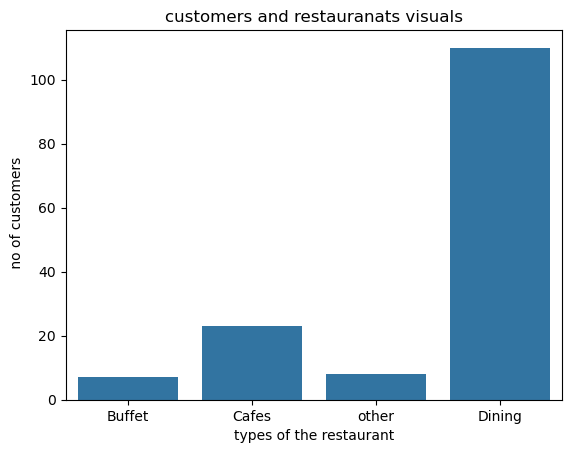

In [55]:
# 110 dining restaurnats
sns.countplot(data=df1,x='listed_in(type)')
plt.xlabel("types of the restaurant")
plt.ylabel(" no of customers")
plt.title("customers and restauranats data")
plt.show()

####  majority of the poeple used to order food from the dining category.

In [60]:
df1['listed_in(type)']

0      Buffet
1      Buffet
2      Buffet
3      Buffet
4      Buffet
        ...  
143    Dining
144    Dining
145    Dining
146    Dining
147    Dining
Name: listed_in(type), Length: 148, dtype: object

In [65]:
v1=df1.groupby('listed_in(type)')['votes'].sum()  # votes vs hotel cols

In [66]:
v1
result=pd.DataFrame({'votes':v1})

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

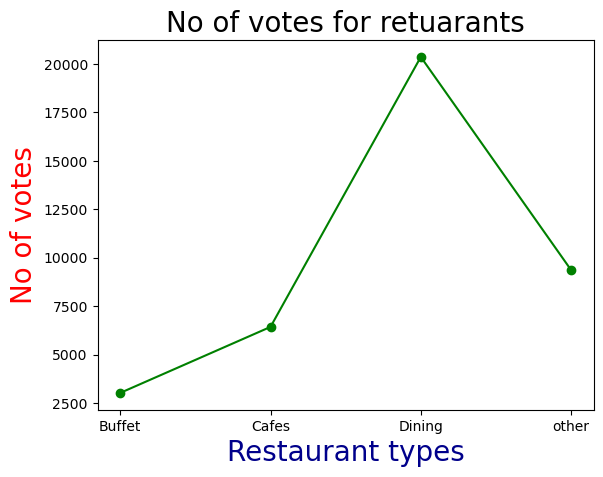

In [75]:
result=pd.DataFrame({'votes':v1})
plt.plot(result,marker='o',c='green')
plt.xlabel("Restaurant types",c='darkblue',size=20)
plt.ylabel("No of votes",c='red',size=20)
plt.title("No of votes for retuarants",c="black",size=20)

plt.show()

##### THE DINING RETAURANT HAS RECIVED THE MAXIMUM VOTES

In [76]:
df1

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


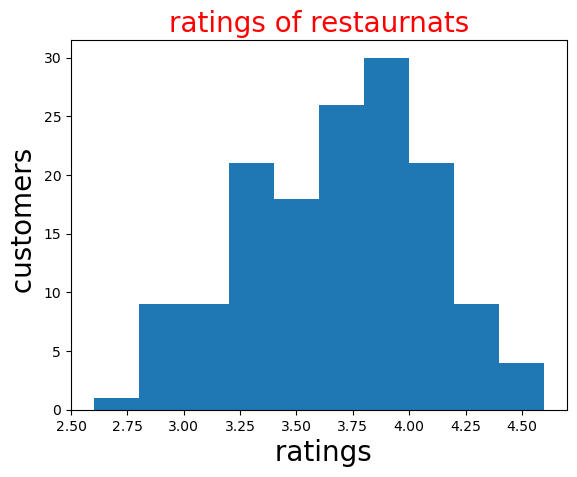

In [82]:
# ratings of differnt restaurants
plt.hist(df1['rate'],bins=10)
plt.xlabel(" ratings",c="black",size=20)
plt.ylabel(" customers",c='black',size=20)
plt.title("ratings of restaurnats",c='red',size=20)
plt.show()

### the majority restaurants has recived the ratings from 3.5 to 4

In [83]:
df1

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


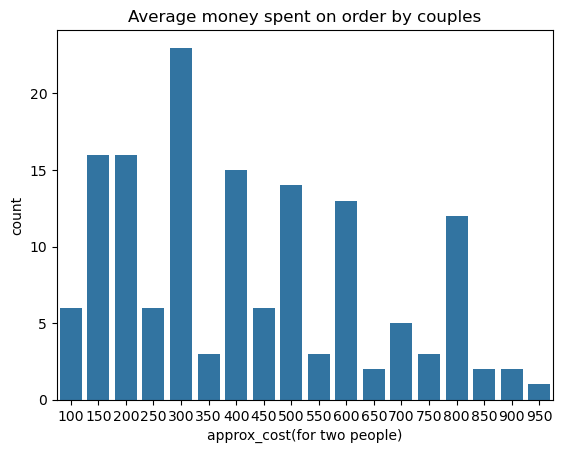

In [90]:
# average money spent by couples on online food orders?

couple_data = df1['approx_cost(for two people)']

sns.countplot(x=couple_data)
plt.title("Average money spent on order by couples")
plt.show()


#### The average money spent by couple on online food is 300 rs (approx)

In [91]:
df1.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


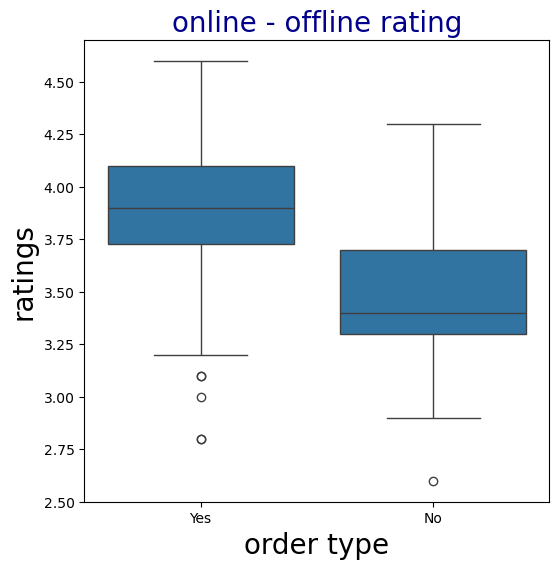

In [95]:
# what mode  is getting more ratings online or offline?

plt.figure(figsize=(6,6))  
sns.boxplot(x='online_order',y='rate',data=df1)
plt.title("online - offline rating",c='darkblue',size=20)
plt.xlabel("order type",c='black',size=20)
plt.ylabel("ratings",c='black',size=20)
           
plt.show()


#### Hence conclusion is , online order has recived the most ratings.